In [ ]:
# logistic regression, decision tree, random forest, support vector machine, k-nearest neighbors, and XGBoost

# It included an input layer, three Dense
# layers with 128, 64, and 32 units, each followed by a Dropout
# layer at 0.5 to mitigate overfitting. ReLU activation functions
# were employed in the Dense layers to introduce non-linearity,
# and the output layer had a single Dense unit with a sigmoid
# activation function for binary classification of cancer
# recurrence. The Adam optimizer with a learning rate of 0.001,
# binary cross-entropy loss, and accuracy as the performance
# metric were used. Training lasted 100 epochs with a batch size
# of 32, and validation data (20% of the test set) helped monitor
# performance and prevent overfitting. 
# interpretability techniques like LIME and Morris Sensitivity Analysis, the model's dependability is enhanced as it makes its decision-making process clearer 

# SVM, XGBoost, and RF
# SVM, DT, KNN, Random Forest, ANN

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Libraries for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



### Load the Dataset

In [2]:
data_path = '../data.csv'
df = pd.read_csv(data_path)

In [3]:
# Display the first few rows
print(df.head())

   Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
0   27      F      No         No              No        Euthyroid   
1   34      F      No        Yes              No        Euthyroid   
2   30      F      No         No              No        Euthyroid   
3   62      F      No         No              No        Euthyroid   
4   62      F      No         No              No        Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality Risk  \
0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   

     T   N   M Stage       Response Recurred  
0  T1a  N0  M0     I  Indeterminate       No  
1  T1a  N0  M0  

In [4]:
# Check data info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [5]:
# Dataset columns
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

### Exploratory Data Analysis (EDA)

In [6]:
# Check for missing values
print(df.isnull().sum())

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64


In [7]:
# Get descriptive statistics for numerical data
print(df.describe())

              Age
count  383.000000
mean    40.866841
std     15.134494
min     15.000000
25%     29.000000
50%     37.000000
75%     51.000000
max     82.000000


In [8]:
# Check unique values in categorical columns
for column in df.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].unique()}")

Gender: ['F' 'M']
Smoking: ['No' 'Yes']
Hx Smoking: ['No' 'Yes']
Hx Radiothreapy: ['No' 'Yes']
Thyroid Function: ['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
Physical Examination: ['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
Adenopathy: ['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
Pathology: ['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']
Focality: ['Uni-Focal' 'Multi-Focal']
Risk: ['Low' 'Intermediate' 'High']
T: ['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']
N: ['N0' 'N1b' 'N1a']
M: ['M0' 'M1']
Stage: ['I' 'II' 'IVB' 'III' 'IVA']
Response: ['Indeterminate' 'Excellent' 'Structural Incomplete'
 'Biochemical Incomplete']
Recurred: ['No' 'Yes']


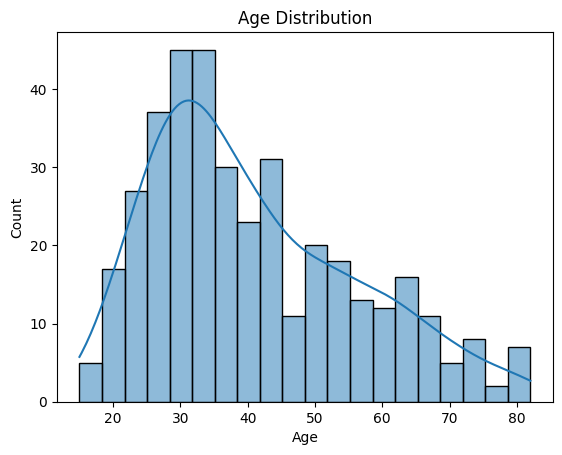

In [9]:
# Distribution of Age
sns.histplot(df['Age'], kde=True, bins=20)
plt.title("Age Distribution")
plt.show()


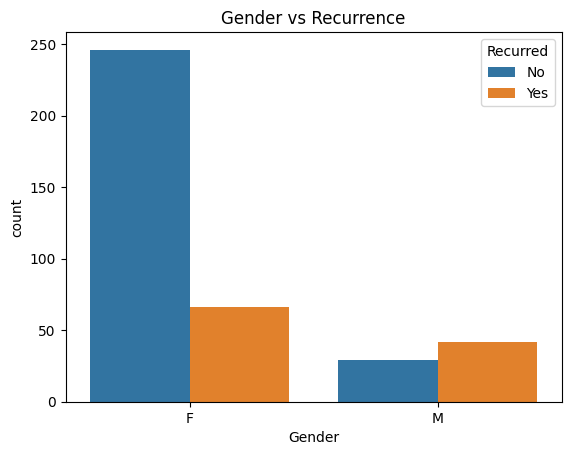

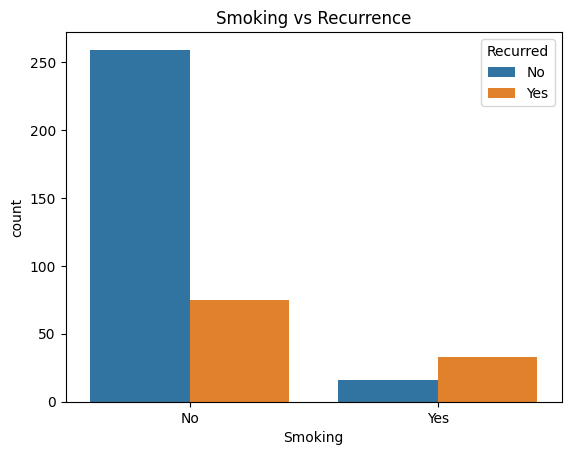

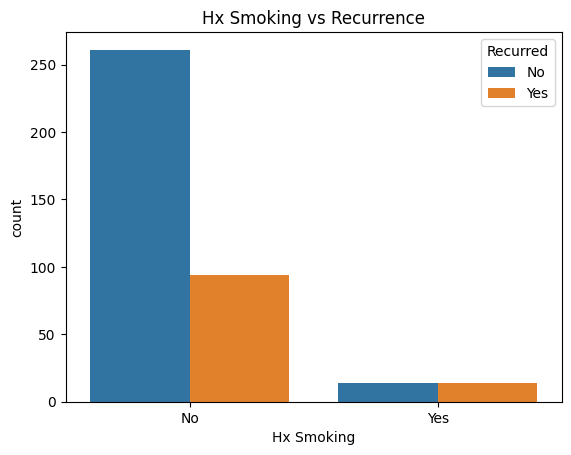

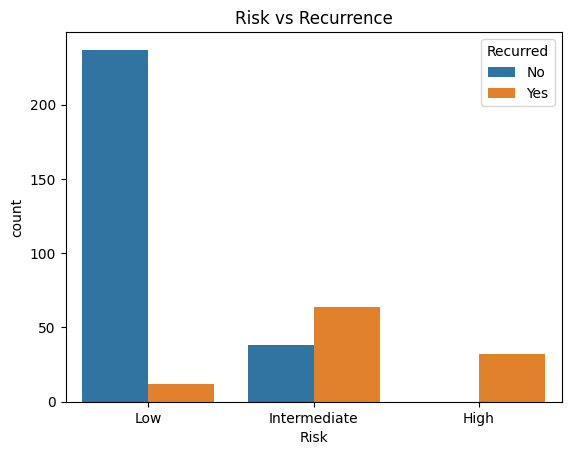

In [10]:
# Check how recurrence is related to Gender, Smoking, etc.
for column in ['Gender', 'Smoking', 'Hx Smoking', 'Risk']:
    sns.countplot(data=df, x=column, hue='Recurred')
    plt.title(f"{column} vs Recurrence")
    plt.show()

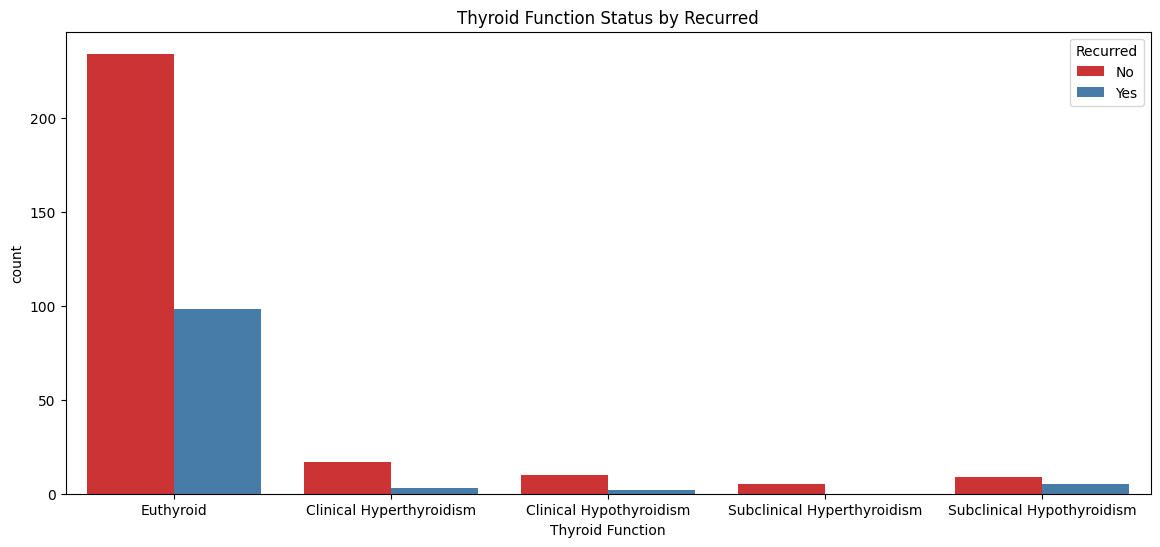

In [11]:
# Plot thyroid function based on recurrence cases
plt.figure(figsize=(14, 6))
sns.countplot(x='Thyroid Function', hue='Recurred', data=df, palette='Set1')
plt.title('Thyroid Function Status by Recurred')
plt.show()

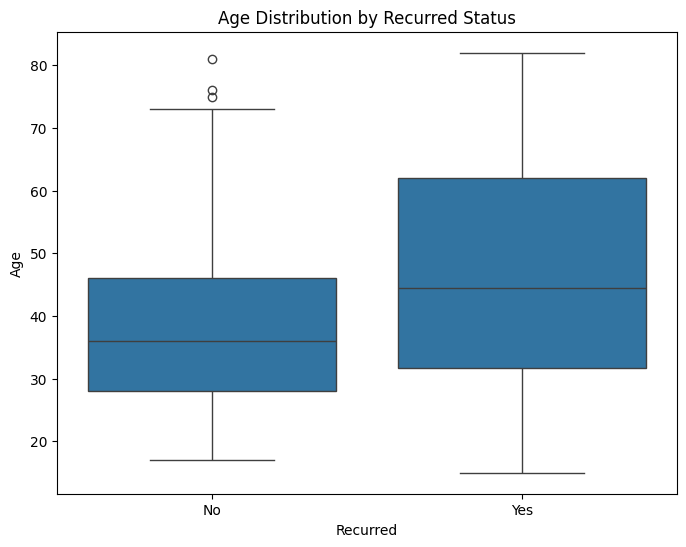

In [12]:
# Explore feature distributions
plt.figure(figsize=(8, 6))
sns.boxplot(x='Recurred', y='Age', data=df)
plt.title('Age Distribution by Recurred Status')
plt.show()


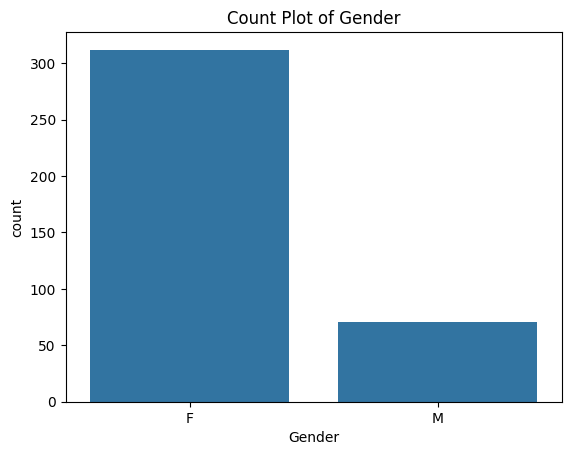

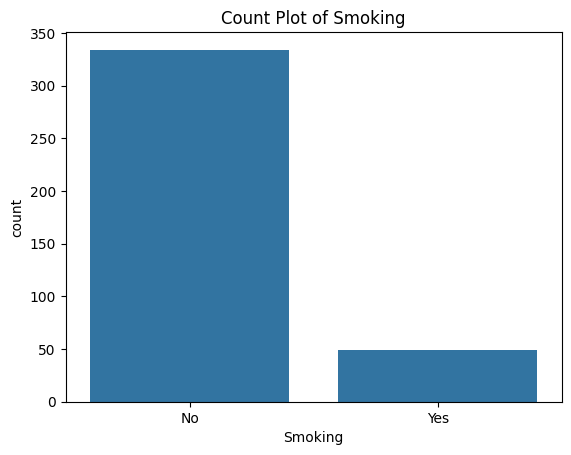

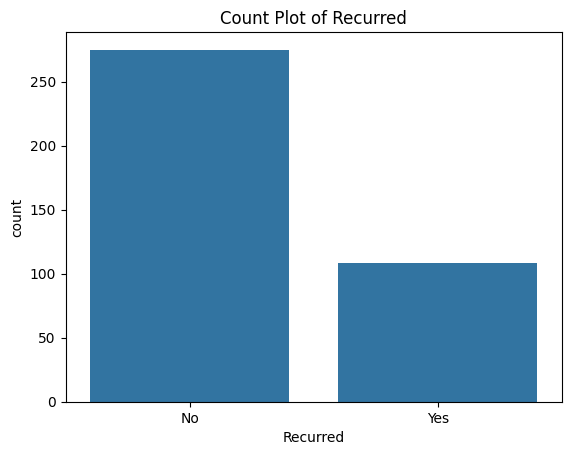

In [13]:
# Count plot for categorical variables
categorical_columns = ['Gender', 'Smoking', 'Recurred']
for column in categorical_columns:
    sns.countplot(data=df, x=column)
    plt.title(f"Count Plot of {column}")
    plt.show()

### Data Preprocessing

In [14]:
# Encode categorical variables
label_encoder = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = label_encoder.fit_transform(df[column])

print(df.head())

   Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
0   27       0        0           0                0                 2   
1   34       0        0           1                0                 2   
2   30       0        0           0                0                 2   
3   62       0        0           0                0                 2   
4   62       0        0           0                0                 2   

   Physical Examination  Adenopathy  Pathology  Focality  Risk  T  N  M  \
0                     3           3          2         1     2  0  0  0   
1                     1           3          2         1     2  0  0  0   
2                     4           3          2         1     2  0  0  0   
3                     4           3          2         1     2  0  0  0   
4                     1           3          2         0     2  0  0  0   

   Stage  Response  Recurred  
0      0         2         0  
1      0         1         0  
2      0   

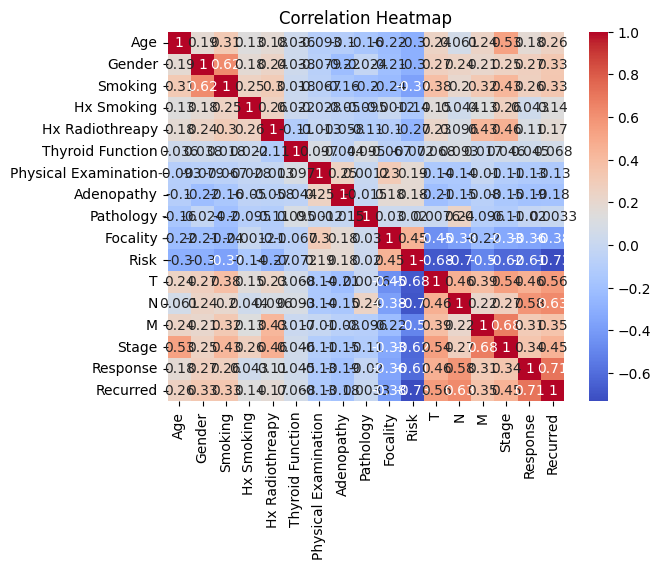

In [15]:
# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [16]:
# Scale Age
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df ['Age'].head() 


0   -0.917439
1   -0.454315
2   -0.718957
3    1.398184
4    1.398184
Name: Age, dtype: float64

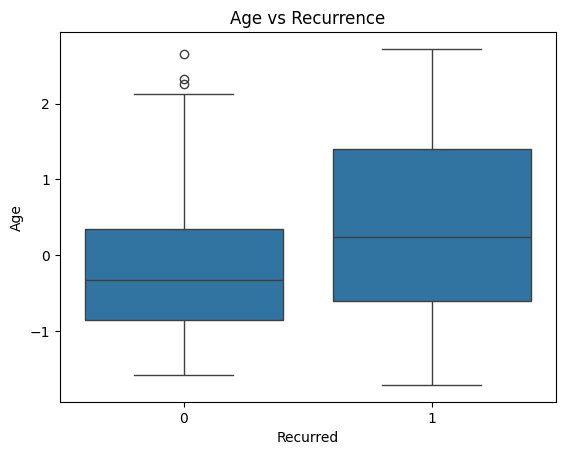

In [17]:
# Examine if age is a significant factor in recurrence.
sns.boxplot(data=df, x='Recurred', y='Age')
plt.title("Age vs Recurrence")
plt.show()


In [18]:
# Define features and target variable
X = df.drop('Recurred', axis=1)  # All columns except the target
y = df['Recurred']  # Target column

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (306, 16)
Testing set shape: (77, 16)


### Model Training

In [39]:
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Evaluate the model
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
    }
    return metrics


#### Logistic Regression

In [42]:
log_reg = LogisticRegression(max_iter=1000)
log_reg_metrics = train_and_evaluate_model(log_reg, X_train, X_test, y_train, y_test)
print("Logistic Regression:", log_reg_metrics)

Logistic Regression: {'Accuracy': 0.935064935064935, 'Precision': 0.9375, 'Recall': 0.7894736842105263, 'F1 Score': 0.8571428571428571, 'ROC-AUC': 0.9355716878402904}


#### Decision Tree

In [43]:
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree_metrics = train_and_evaluate_model(dec_tree, X_train, X_test, y_train, y_test)
print("Decision Tree:", dec_tree_metrics)


Decision Tree: {'Accuracy': 0.922077922077922, 'Precision': 0.8095238095238095, 'Recall': 0.8947368421052632, 'F1 Score': 0.85, 'ROC-AUC': 0.912885662431942}


#### Random Forest

In [76]:
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)
rand_forest_metrics = train_and_evaluate_model(rand_forest, X_train, X_test, y_train, y_test)
print("Random Forest:", rand_forest_metrics)


Random Forest: {'Accuracy': 0.987012987012987, 'Precision': 1.0, 'Recall': 0.9473684210526315, 'F1 Score': 0.972972972972973, 'ROC-AUC': 0.9972776769509982}


#### Support Vector Machine

In [45]:
svc = SVC(kernel='linear', probability=True, random_state=42)
svc_metrics = train_and_evaluate_model(svc, X_train, X_test, y_train, y_test)
print("Support Vector Machine:", svc_metrics)


Support Vector Machine: {'Accuracy': 0.961038961038961, 'Precision': 1.0, 'Recall': 0.8421052631578947, 'F1 Score': 0.9142857142857143, 'ROC-AUC': 0.9074410163339383}


#### K Nearest Neighbors

In [46]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_metrics = train_and_evaluate_model(knn, X_train, X_test, y_train, y_test)
print("K-Nearest Neighbors:", knn_metrics)


K-Nearest Neighbors: {'Accuracy': 0.9090909090909091, 'Precision': 0.9285714285714286, 'Recall': 0.6842105263157895, 'F1 Score': 0.7878787878787878, 'ROC-AUC': 0.9591651542649726}


#### XG Boost

In [ ]:
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_metrics = train_and_evaluate_model(xgb, X_train, X_test, y_train, y_test)
print("XGBoost:", xgb_metrics)


XGBoost: {'Accuracy': 0.961038961038961, 'Precision': 0.9, 'Recall': 0.9473684210526315, 'F1 Score': 0.9230769230769231, 'ROC-AUC': 0.9972776769509981}


In [49]:
import pandas as pd

# Combine metrics into a single DataFrame
results = pd.DataFrame({
    "Logistic Regression": log_reg_metrics,
    "Decision Tree": dec_tree_metrics,
    "Random Forest": rand_forest_metrics,
    "SVM": svc_metrics,
    "KNN": knn_metrics,
    "XGBoost": xgb_metrics
}).T

print(results)


                     Accuracy  Precision    Recall  F1 Score   ROC-AUC
Logistic Regression  0.935065   0.937500  0.789474  0.857143  0.935572
Decision Tree        0.922078   0.809524  0.894737  0.850000  0.912886
Random Forest        0.987013   1.000000  0.947368  0.972973  0.997278
SVM                  0.961039   1.000000  0.842105  0.914286  0.907441
KNN                  0.909091   0.928571  0.684211  0.787879  0.959165
XGBoost              0.961039   0.900000  0.947368  0.923077  0.997278


### Model Comparision

C:\Users\hamma\AppData\Local\Temp\ipykernel_18964\3401593052.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\hamma\AppData\Local\Temp\ipykernel_18964\3401593052.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\hamma\AppData\Local\Temp\ipykernel_18964\3401593052.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\hamma\AppData\Local\Temp\ipykernel_18964\3401593052.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `h

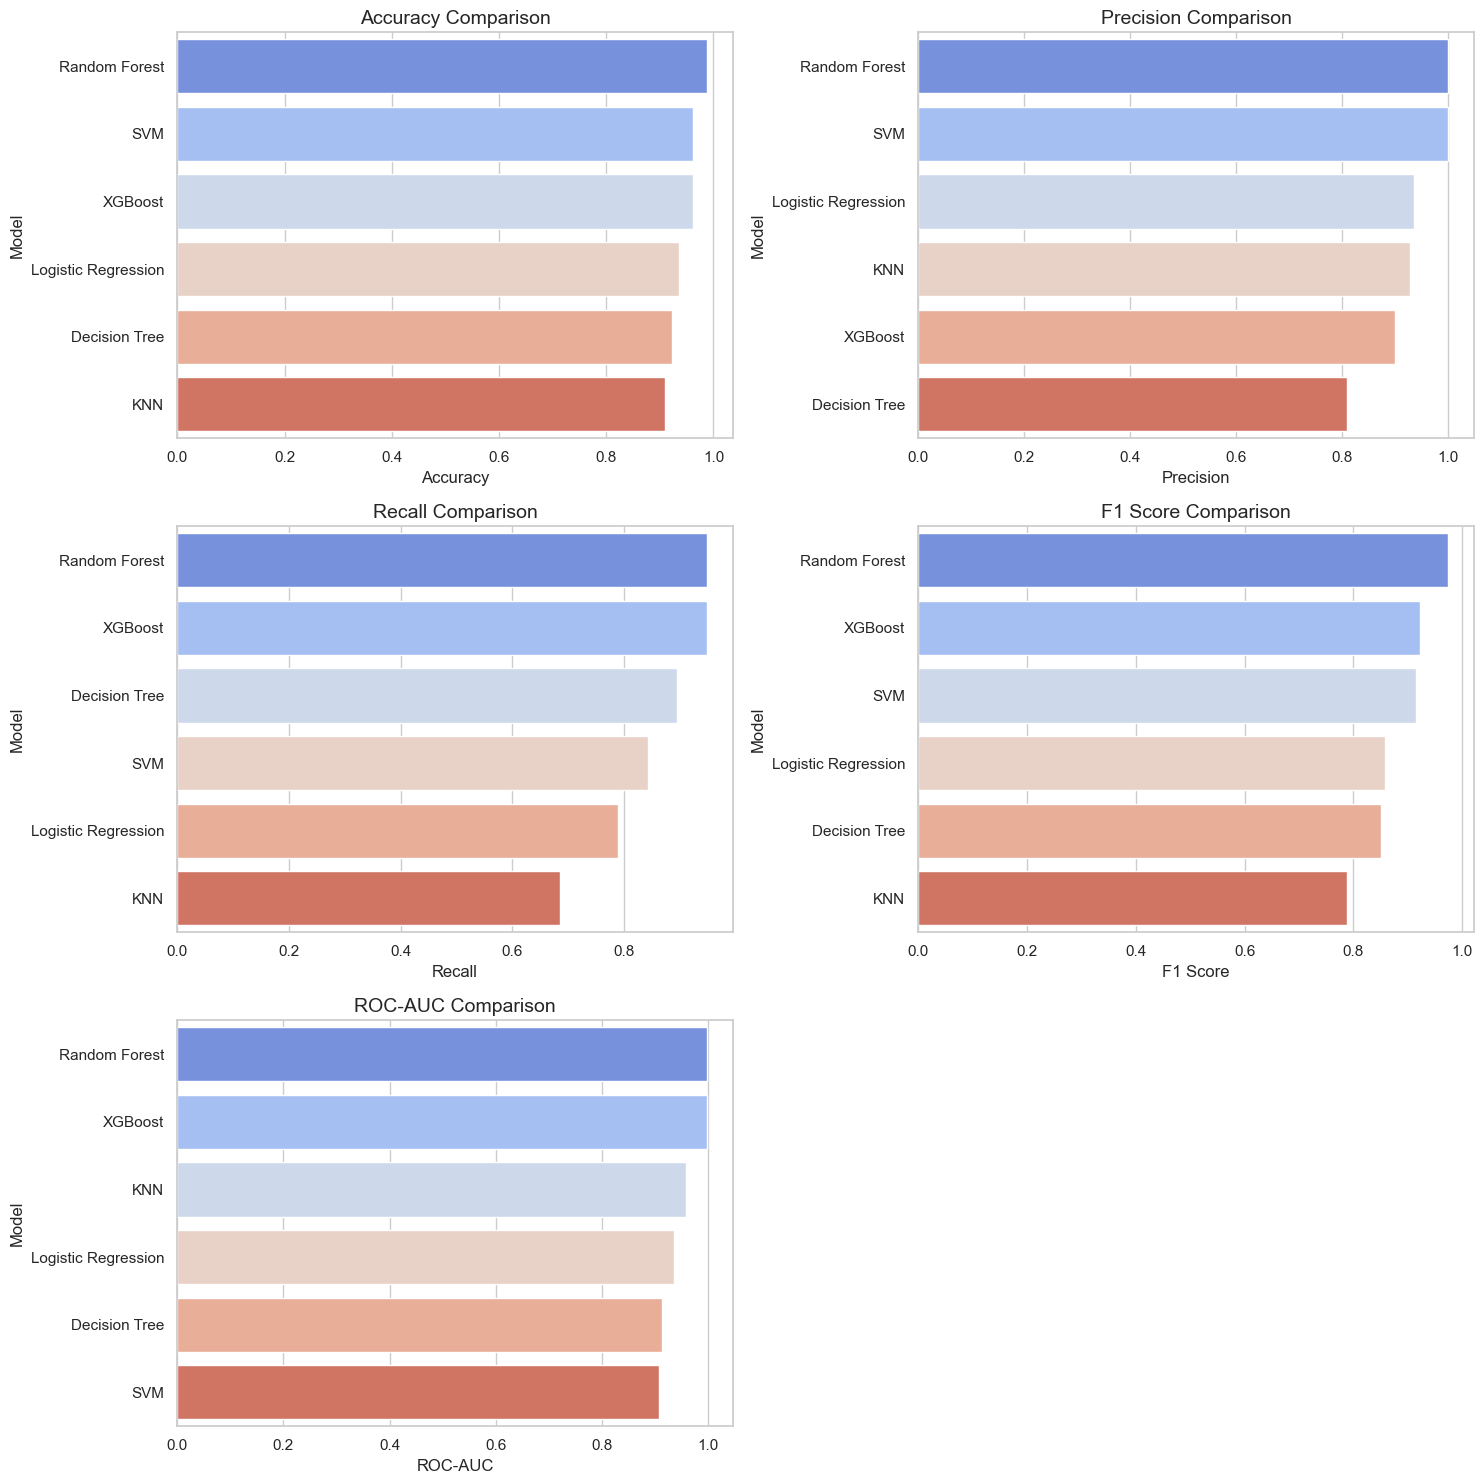

In [53]:
# Ensure the model names are in a column
results.reset_index(inplace=True)
results.rename(columns={"index": "Model"}, inplace=True)

# Plot each metric in separate subplots
sns.set(style="whitegrid")
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    if metric in results.columns:
        sns.barplot(
            x=metric,
            y="Model",
            data=results.sort_values(by=metric, ascending=False),
            ax=axes[i],
            palette="coolwarm"
        )
        axes[i].set_title(f"{metric} Comparison", fontsize=14)
        axes[i].set_xlabel(metric, fontsize=12)
        axes[i].set_ylabel("Model", fontsize=12)

# Remove any unused subplots
for j in range(len(metrics), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

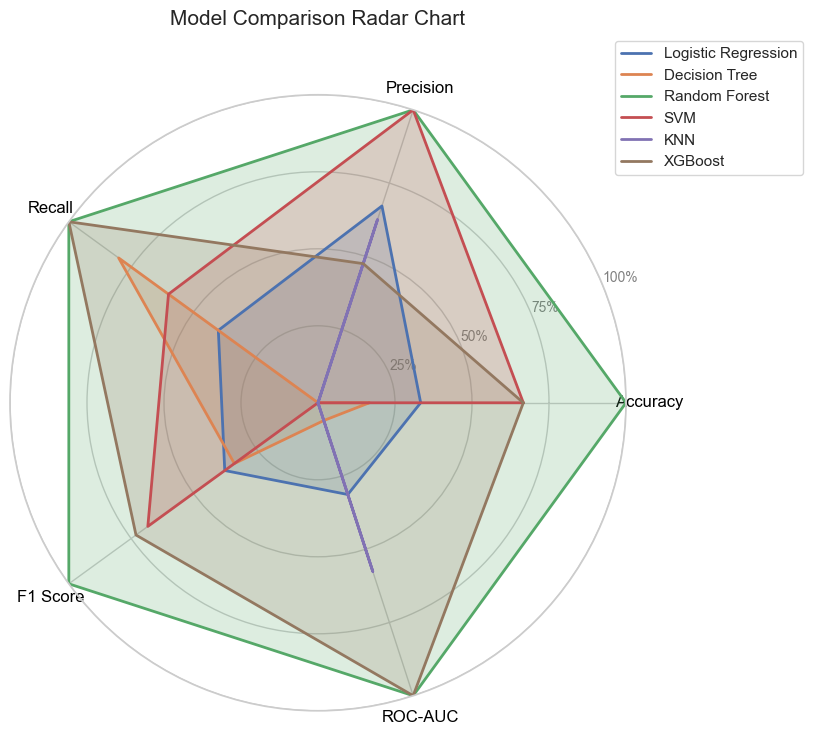

In [54]:
from math import pi

# Prepare data for radar chart
categories = metrics
num_categories = len(categories)

# Normalize data
df_radar = results.copy()
df_radar[metrics] = df_radar[metrics].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Radar plot
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plot each model
for i, row in df_radar.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # Complete the loop
    angles = [n / float(num_categories) * 2 * pi for n in range(num_categories)]
    angles += angles[:1]
    
    ax.plot(angles, values, label=row["Model"], linewidth=2)
    ax.fill(angles, values, alpha=0.2)

# Add labels
plt.xticks(angles[:-1], categories, color="black", fontsize=12)
plt.yticks([0.25, 0.5, 0.75, 1.0], ["25%", "50%", "75%", "100%"], color="grey", size=10)
plt.ylim(0, 1)

# Title and legend
plt.title("Model Comparison Radar Chart", size=15, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()


### Deep Learning Model

In [ ]:
# Define the DNN model architecture
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Binary output

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

c:\Users\hamma\Documents\python_venv\trans_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.3636 - loss: 0.7957 - val_accuracy: 0.7581 - val_loss: 0.6227
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6851 - loss: 0.6170 - val_accuracy: 0.7258 - val_loss: 0.5789
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8173 - loss: 0.5355 - val_accuracy: 0.7419 - val_loss: 0.5393
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8161 - loss: 0.4942 - val_accuracy: 0.7742 - val_loss: 0.4676
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8377 - loss: 0.4336 - val_accuracy: 0.8387 - val_loss: 0.3991
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8671 - loss: 0.3534 - val_accuracy: 0.8710 - val_loss: 0.3473
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9132 - loss: 0.2973 - val_accuracy: 0.8710 - val_loss: 0.3159
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8801 - loss: 0.3013 - val_accuracy: 0.8710 - val_loss: 0.2995
Epoch 9

In [70]:
# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate the evaluation metrics for the DNN model
accuracy_dnn = accuracy_score(y_test, y_pred)
precision_dnn = precision_score(y_test, y_pred)
recall_dnn = recall_score(y_test, y_pred)
f1_dnn = f1_score(y_test, y_pred)
roc_auc_dnn = roc_auc_score(y_test, y_pred)

# Print the DNN model metrics
print("DNN Accuracy:", accuracy_dnn)
print("DNN Precision:", precision_dnn)
print("DNN Recall:", recall_dnn)
print("DNN F1 Score:", f1_dnn)
print("DNN ROC-AUC:", roc_auc_dnn)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
DNN Accuracy: 0.922077922077922
DNN Precision: 0.8823529411764706
DNN Recall: 0.7894736842105263
DNN F1 Score: 0.8333333333333334
DNN ROC-AUC: 0.8774954627949184


In [68]:
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.935065,0.937500,0.789474,0.857143,0.935572
1,Decision Tree,0.922078,0.809524,0.894737,0.850000,0.912886
2,Random Forest,0.987013,1.000000,0.947368,0.972973,0.997278
3,SVM,0.961039,1.000000,0.842105,0.914286,0.907441
4,KNN,0.909091,0.928571,0.684211,0.787879,0.959165
5,XGBoost,0.961039,0.900000,0.947368,0.923077,0.997278


In [71]:
# Add DNN results to the dataframe
dnn_results = pd.DataFrame({
    'Model': ['DNN'],
    'Accuracy': [accuracy_dnn],
    'Precision': [precision_dnn],
    'Recall': [recall_dnn],
    'F1 Score': [f1_dnn],
    'ROC-AUC': [roc_auc_dnn]
})

# Append DNN results to the original results
results_df = pd.concat([results, dnn_results], ignore_index=True)

In [75]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.935065,0.937500,0.789474,0.857143,0.935572
1,Decision Tree,0.922078,0.809524,0.894737,0.850000,0.912886
2,Random Forest,0.987013,1.000000,0.947368,0.972973,0.997278
3,SVM,0.961039,1.000000,0.842105,0.914286,0.907441
4,KNN,0.909091,0.928571,0.684211,0.787879,0.959165
5,XGBoost,0.961039,0.900000,0.947368,0.923077,0.997278
6,DNN,0.922078,0.882353,0.789474,0.833333,0.877495


C:\Users\hamma\AppData\Local\Temp\ipykernel_18964\3094019025.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\hamma\AppData\Local\Temp\ipykernel_18964\3094019025.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\hamma\AppData\Local\Temp\ipykernel_18964\3094019025.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\hamma\AppData\Local\Temp\ipykernel_18964\3094019025.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` 

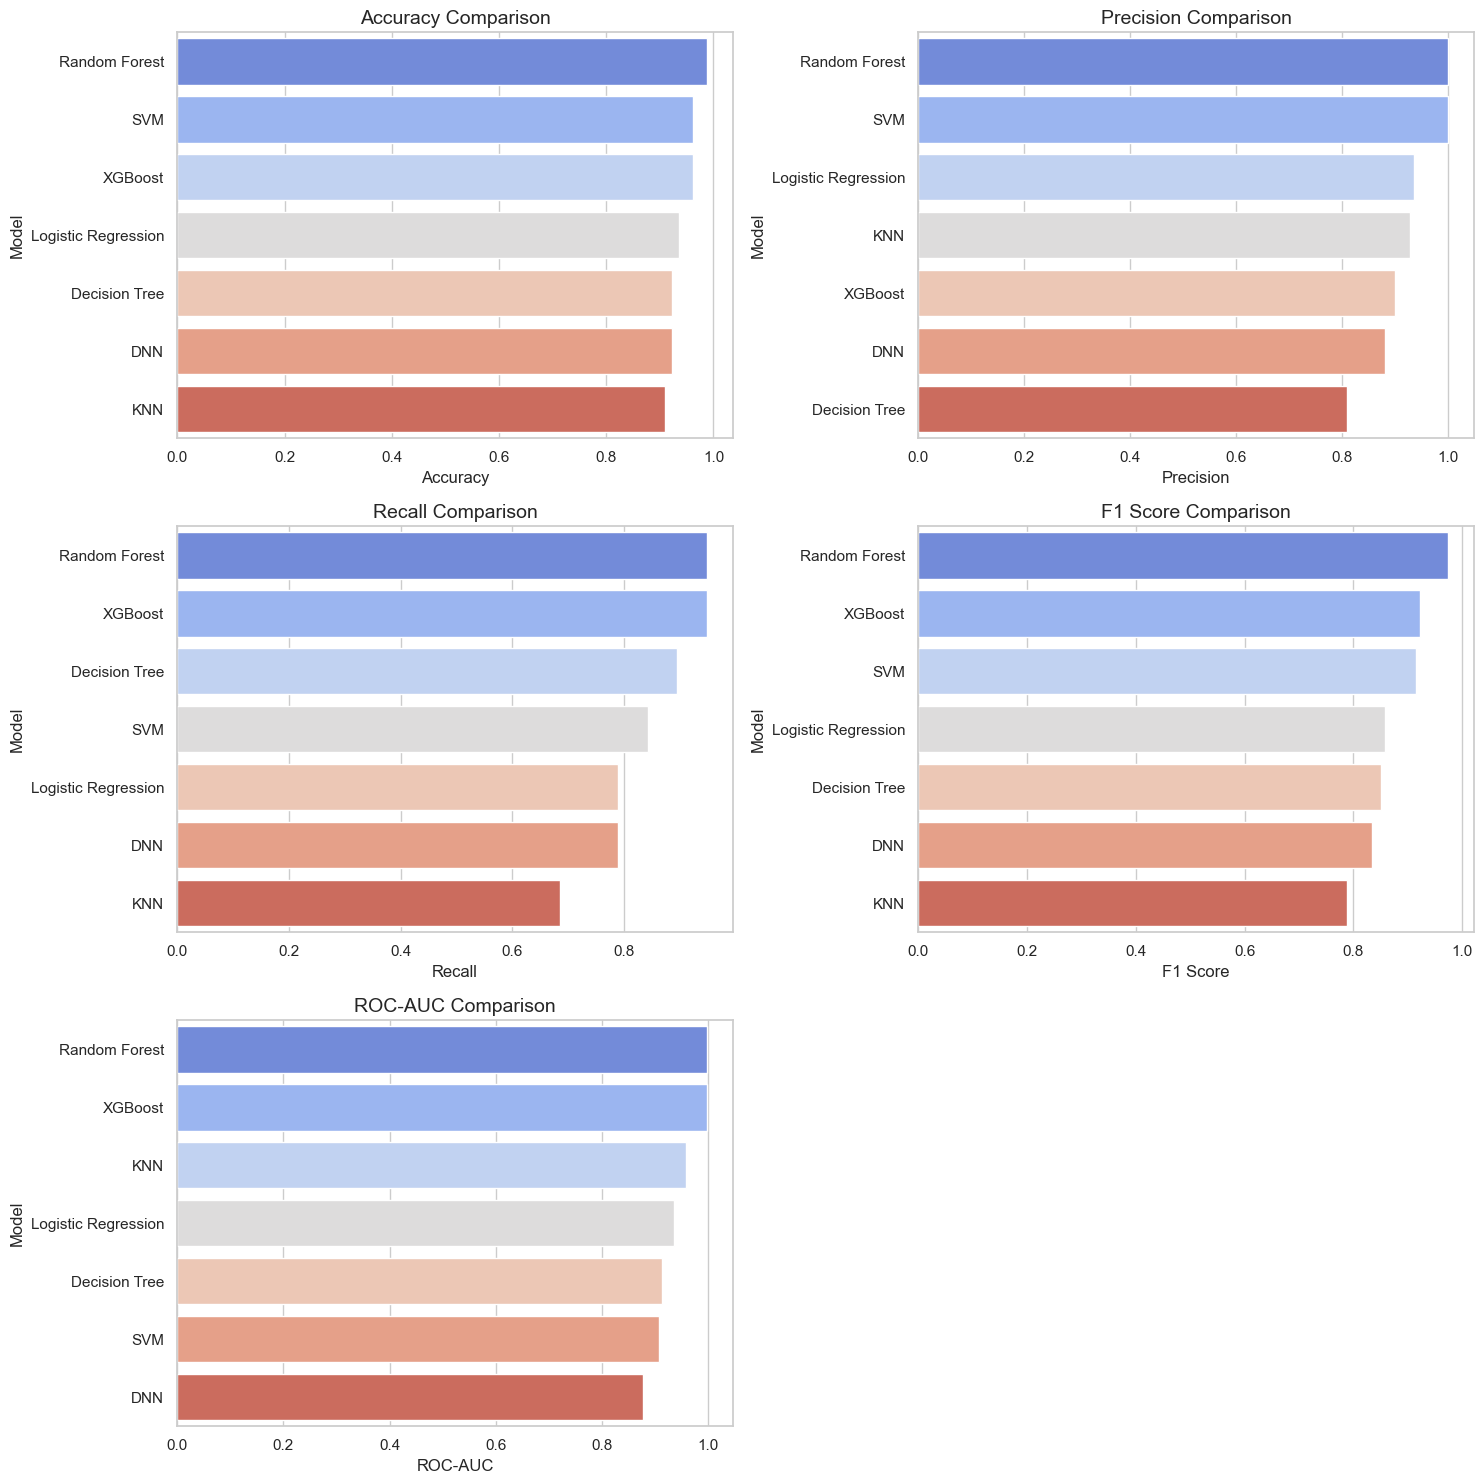

In [74]:
# Plot each metric in separate subplots
sns.set(style="whitegrid")
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    if metric in results.columns:
        sns.barplot(
            x=metric,
            y="Model",
            data=results_df.sort_values(by=metric, ascending=False),
            ax=axes[i],
            palette="coolwarm"
        )
        axes[i].set_title(f"{metric} Comparison", fontsize=14)
        axes[i].set_xlabel(metric, fontsize=12)
        axes[i].set_ylabel("Model", fontsize=12)

# Remove any unused subplots
for j in range(len(metrics), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Hyperparameter Tuning with RF

In [20]:
print("Training set shape:", X_train.shape)
print("Training label shape:", y_train.shape)

print("Testing set shape:", X_test.shape)
print("Testing label shape:", y_test.shape)

Training set shape: (306, 16)
Training label shape: (306,)
Testing set shape: (77, 16)
Testing label shape: (77,)


In [31]:
y_train.head(5)

165    0
321    1
220    0
94     0
232    1
Name: Recurred, dtype: int32

In [32]:
X_train.head(5)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
165,-0.057351,0,0,0,0,2,1,3,3,0,2,2,0,0,0,1
321,1.398184,0,0,0,0,2,1,5,3,0,1,3,2,0,1,3
220,-0.785118,0,0,0,0,2,1,3,3,1,2,2,1,0,0,2
94,-0.255833,0,0,0,0,2,3,3,1,0,2,2,0,0,0,1
232,-0.652797,0,0,0,0,2,3,2,3,1,1,2,2,0,0,3


In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings to sample
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    random_state=42,
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Evaluate the model on the test data
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40}
Best Cross-Validation Accuracy: 0.9542570068746695
Test Accuracy: 0.974025974025974


### Hyperparameter Tuning with MLP

In [37]:
from sklearn.neural_network import MLPClassifier

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (150, 100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # L2 regularization parameter
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 300, 400]
}

# Create an MLP Classifier
mlp_model = MLPClassifier(random_state=42)

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=mlp_model,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings to sample
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    random_state=42,
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Evaluate the model on the test data
best_mlp_model = random_search.best_estimator_
y_pred = best_mlp_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'solver': 'adam', 'max_iter': 300, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 50), 'alpha': 0.1, 'activation': 'relu'}
Best Cross-Validation Accuracy: 0.918455843469064
Test Accuracy: 0.961038961038961


c:\Users\hamma\Documents\python_venv\trans_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


### Hyperparameter Tuning with DNN

In [38]:
from scikeras.wrappers import KerasClassifier

# Function to create the Keras Sequential model
def create_model(optimizer='adam', activation='relu', neurons=32):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification (use 'softmax' for multi-class)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model using KerasClassifier
keras_model = KerasClassifier(model=create_model, verbose=0)

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'model__neurons': [16, 32, 64, 128],  # Number of neurons in each layer
    'model__activation': ['relu', 'tanh', 'sigmoid'],  # Activation functions
    'model__optimizer': ['adam', 'rmsprop', 'sgd'],  # Optimizers
    'batch_size': [8, 16, 32, 64],  # Batch sizes
    'epochs': [50, 100, 150]  # Number of epochs
}

# Perform RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=keras_model,
    param_distributions=param_distributions,
    n_iter=20,  # Number of parameter combinations to try
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the RandomizedSearchCV on training data
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Evaluate the best model on the test set
best_keras_model = random_search.best_estimator_
y_pred = (best_keras_model.predict(X_test) > 0.5).astype("int32")  # Threshold at 0.5 for binary classification
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\hamma\Documents\python_venv\trans_env\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
c:\Users\hamma\Documents\python_venv\trans_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Parameters: {'model__optimizer': 'rmsprop', 'model__neurons': 128, 'model__activation': 'tanh', 'epochs': 100, 'batch_size': 64}
Best Cross-Validation Accuracy: 0.9151771549444737
Test Accuracy: 0.961038961038961


In [ ]:
# Create model function
def create_model(optimizer='adam', activation='relu', neurons_input=32, neurons_hidden=32, dropout_rate=0.2, num_layers=3):
    model = Sequential()
    # Input Layer
    model.add(Dense(neurons_input, input_dim=X_train.shape[1], activation=activation))
    model.add(Dropout(dropout_rate))
    
    # Hidden Layers
    for _ in range(num_layers - 1):  # Subtract 1 for the input layer already added
        model.add(Dense(neurons_hidden, activation=activation))
        model.add(Dropout(dropout_rate))
    
    # Output Layer
    model.add(Dense(1, activation='sigmoid'))  # Binary output
    
    # Compile the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
keras_model = KerasClassifier(model=create_model, verbose=0)

# Define the hyperparameter grid
param_distributions = {
    'model__optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax'],
    'model__dropout_rate': [0.1, 0.2],
    'model__neurons_input': [32, 64, 128, 256],
    'model__neurons_hidden': [32, 64, 128, 256],
    'model__num_layers': [2, 3, 4, 5],
    'model__activation': ['relu', 'tanh', 'selu'],
    'batch_size': [16, 32, 64],
    'epochs': [10, 50, 100]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=keras_model,
    param_distributions=param_distributions,
    n_iter=20,  # Adjust as needed for computational resources
    scoring='accuracy',
    cv=5,  # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the RandomizedSearchCV on training data
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

# Evaluate the best model on the test set
best_keras_model = random_search.best_estimator_
y_pred = (best_keras_model.predict(X_test) > 0.5).astype("int32")  # Threshold at 0.5 for binary classification
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\hamma\Documents\python_venv\trans_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Parameters: {'model__optimizer': 'Adam', 'model__num_layers': 3, 'model__neurons_input': 32, 'model__neurons_hidden': 128, 'model__dropout_rate': 0.2, 'model__activation': 'selu', 'epochs': 50, 'batch_size': 16}
Best Cross-Validation Accuracy: 0.9019607843137254
Test Accuracy: 0.935064935064935
